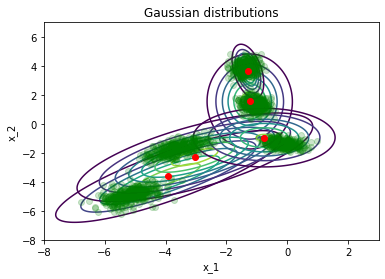

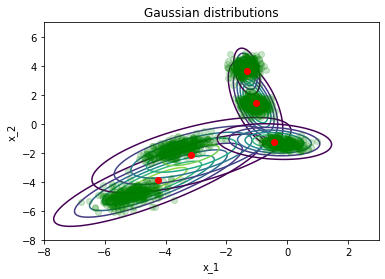

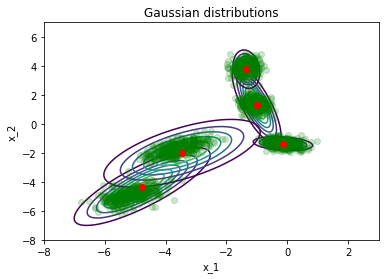

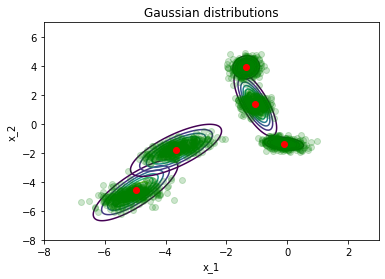

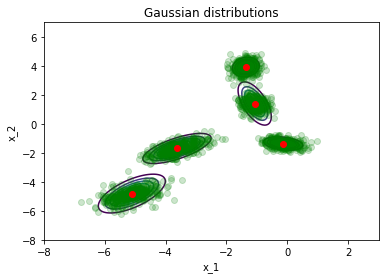

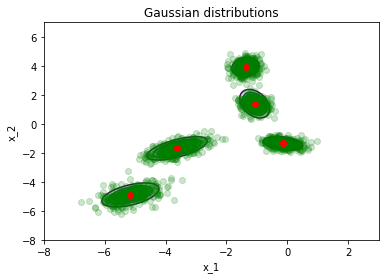

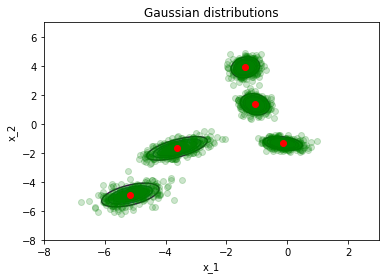

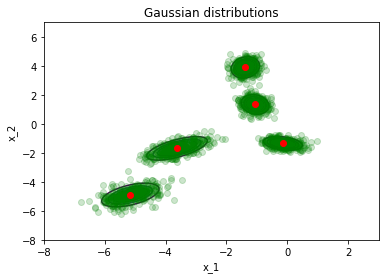

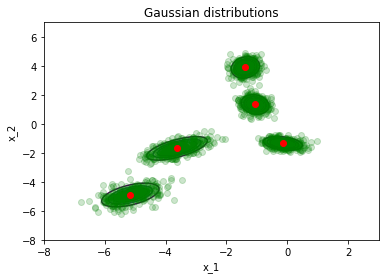

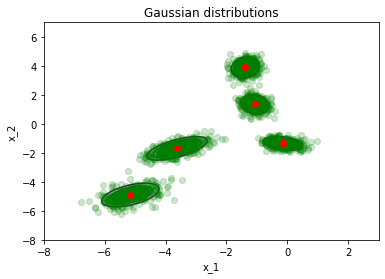

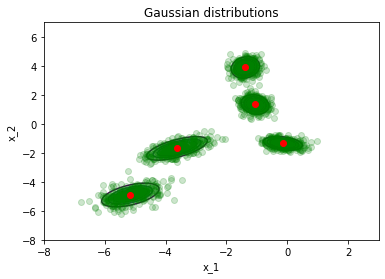

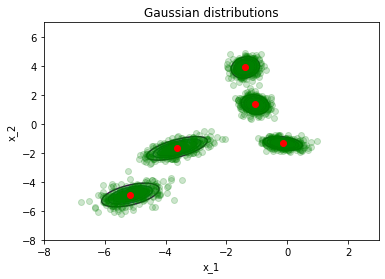

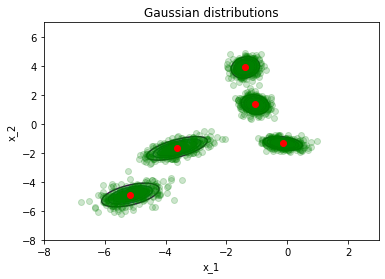

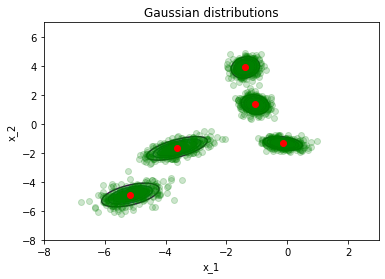

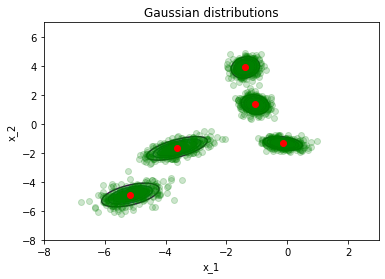

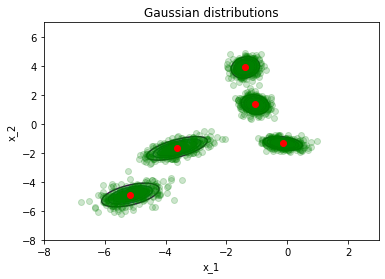

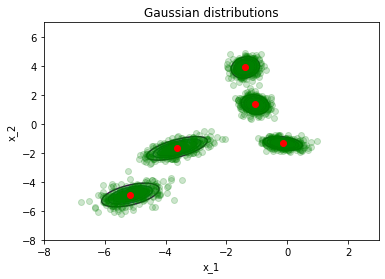

Successfully converged after  17


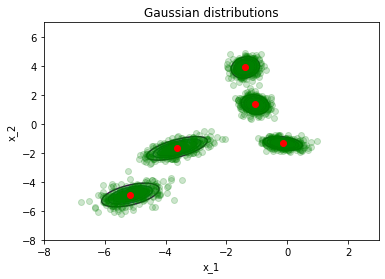

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace
from numpy.lib import dstack
from scipy.stats import multivariate_normal
from scipy.stats.stats import WeightedTauResult


def visualization(x: list, y: list, means, variances, K):
    """Visualizing the dataset and Gaussian distributions"""
    plt.figure()
    plt.title('Gaussian distributions')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.plot(x, y, 'go', alpha=0.2)
    plt.plot(means[:,0], means[:,1], 'ro')
    #Creating a grid for a visualization purpose
    X, Y = np.meshgrid(linspace(-8,3,500), linspace(-8,7,500))
    pos = dstack((X,Y))
    for k in range(K):
        Z = multivariate_normal.pdf(pos, means[k,:], variances[k,:,:])
        plt.contour(X,Y, Z, extend='min')
    plt.show()


#Reading the dataset from file
f = open('portfoliodataset.txt')
lines = f.readlines()
x = []
y = []
for line in lines:
    x.append(float(line.split(' ')[0]))
    y.append(float(line.split(' ')[1]))
f.close()

#Construct the matrix called data
data = np.vstack((x,y)) # the size is 2 x 2000
# visualization(x, y)

#Initializing the paratmers for EM algorithm
K = 5 # number of the Gaussian distributions
means = np.zeros((K,2))
variances = np.zeros((K,2,2))
for k in range(K):
    means[k] = np.random.normal(size=(1,2))
    variances[k] = np.eye(2)
weights = np.ones((K,1)) / K # This is because the sum of the weiths must be equal to 1
# visualization(x, y, means, variances, K)
LL = [0]
N = len(x)
r = np.zeros((K,N)) # r[1][123] 124th data -> 2st Gaussian 

#EM algorithm
# run for 1000 times unless it converges
for iterative in range(1000):
    #E-step 
    for k in range(K):
        r[k] = weights[k] * multivariate_normal.pdf(data.T, means[k,:], variances[k,:,:])
    r = r / np.sum(r, axis=0)
    #M-step
    weights = np.sum(r, axis=1) / N
    for k in range(K):
        means[k] = np.sum(r[k] * data, axis=1) / np.sum(r[k])
        diff = data - means[k:k+1].T # 2x2000 - 2x1
        variances[k] = np.dot(r[k] * diff, diff.T) / np.sum(r[k])
    #Computing the log-likelihood
    visualization(x, y, means, variances, K)
    gaussian = 0
    for k in range(K):
        gaussian +=  weights[k] * multivariate_normal.pdf(data.T, means[k,:], variances[k,:,:])
    LL.append(-np.sum(np.log(gaussian)))

    #Check whether or not it converges
    if np.absolute(LL[iterative] - LL[iterative+1]) < 1e-100:
        print('Successfully converged after ', iterative+1)
        visualization(x, y, means, variances, K)
        break
